<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

 # Titanic - Machine Learning from Disaster
 by R.S.M Group No.1
* Rehab AlHarbi
* Modhi AlMannaa
* Shahad AlMangor

## Import and Data Loader

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load Data
---

Load titanic `train.csv` and `test.csv` from Kaggle into `DataFrames`.

In [2]:
train = pd.read_csv('../titanic/data/train.csv')

In [3]:
test = pd.read_csv('../titanic/data/test.csv')

## Dropping PassengerId column

Remove PassengerId train and test datasetes then Save it in new dataframe to use it later 

In [4]:
# Saving the ID column for the submission file
test_ID = test["PassengerId"]

In [5]:
# Dropping the column "Id", since it's a non-explanatory variable.
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)


Now we see the shape after remove PassengerId

In [6]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (891, 11)
Test data shape: (418, 10)


## Data Cleaning

In [7]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [11]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

## Create these heatmaps, yellow are the missing data

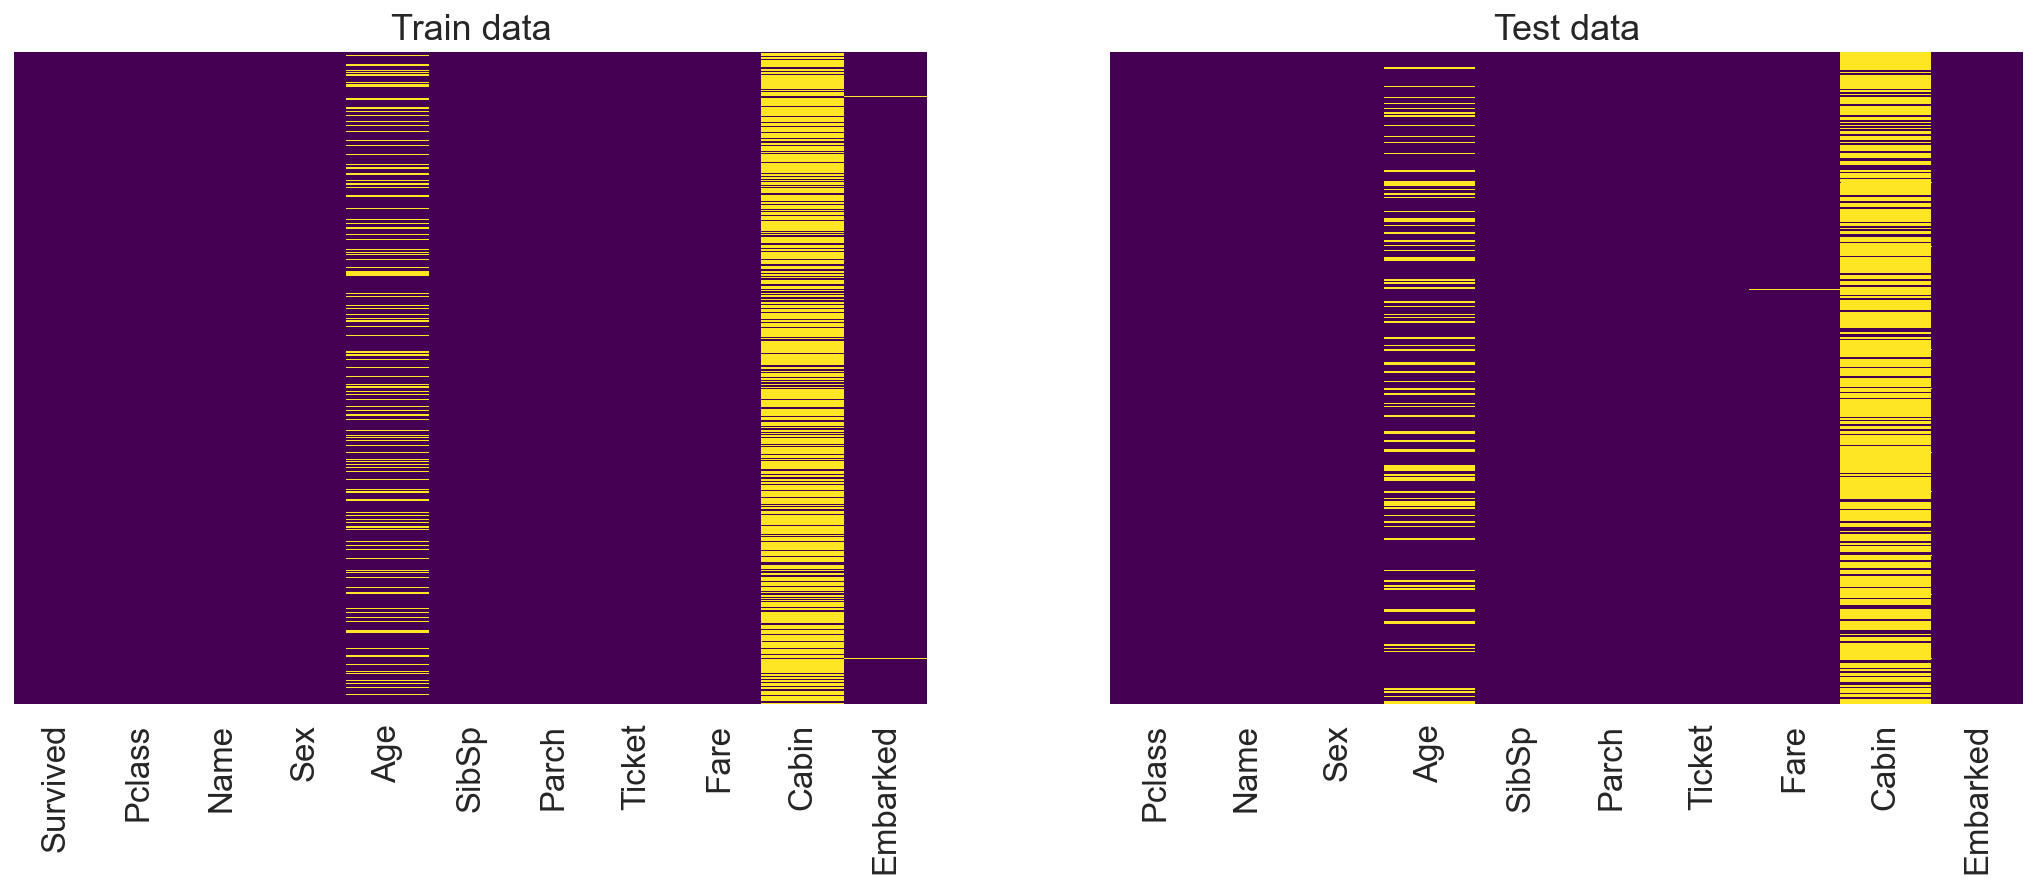

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

## Dropping and Remove rows with missing values

In [14]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
highest_value = 'S'
data = [train, test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(highest_value)

In [16]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
train.shape

(891, 11)

## Fill the missing value of Fare with everyone from the same Pclass

In [18]:
mean_fare = test['Fare'].mean()

In [19]:
print(f'The mean fare for the Pclass (for missing fare data) is:', mean_fare)

The mean fare for the Pclass (for missing fare data) is: 35.627188489208635


In [20]:
test['Fare'] = test['Fare'].fillna(mean_fare)

In [21]:
mean_pclass = train.groupby(['Pclass'])[['Age']].mean()

In [22]:
mean_pclass

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [23]:
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [25]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [26]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [27]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [28]:
# cabin feature
# Train data set
train.Cabin.fillna(0,inplace=True)

In [29]:
train['Cabin'] = train['Cabin'].apply(lambda x: 1 if x!=0 else 0)

In [30]:
train['Cabin'] = train['Cabin'].astype('int64')

In [31]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin         int64
Embarked     object
dtype: object

In [32]:
#cabin feature
# Test data set
test.Cabin.fillna(0,inplace=True)

In [33]:
test['Cabin'] = test['Cabin'].apply(lambda x: 1 if x!=0 else 0)

In [34]:
test['Cabin'] = test['Cabin'].astype('int64')

In [35]:
test.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin         int64
Embarked     object
dtype: object

## Create these heatmaps after fill out the missing data

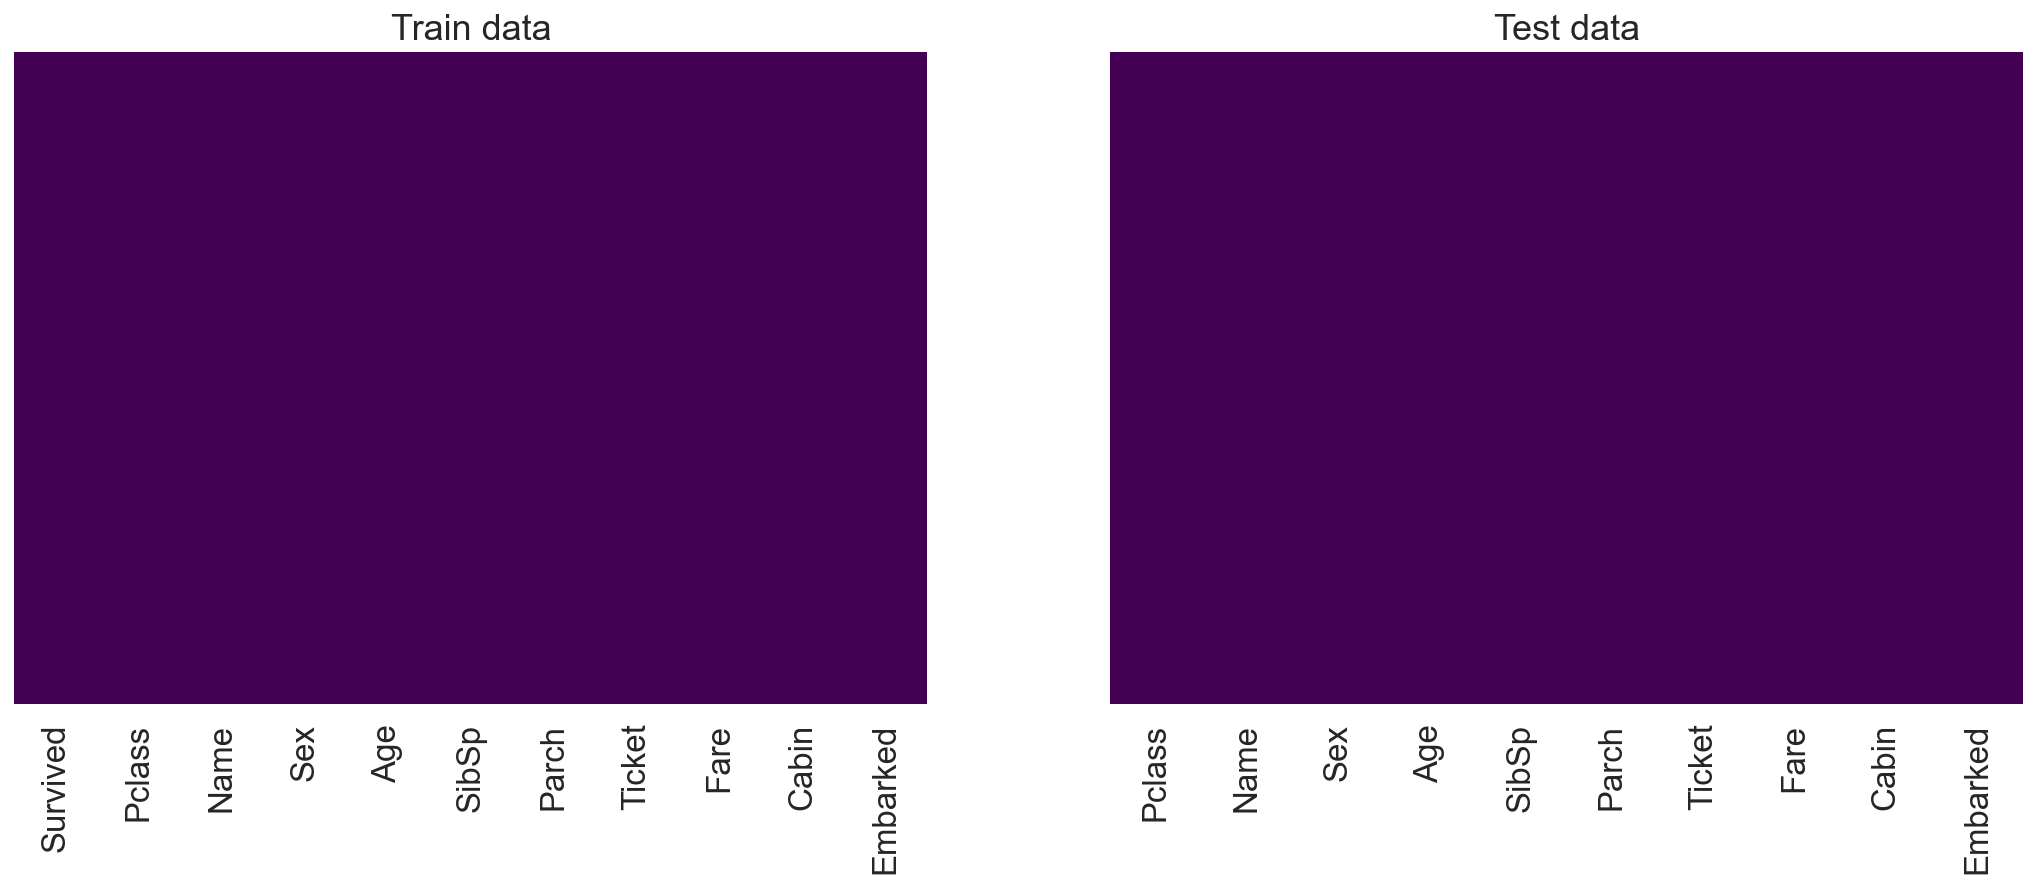

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

## Dummy the Sex and Embarked columns 

In [37]:
# Dummy the Sex and Embarked columns
# Train dataset
train = pd.get_dummies(train, columns=['Sex','Embarked'], drop_first=True)

In [38]:
#Test dataset
test = pd.get_dummies(test, columns=['Sex','Embarked'], drop_first=True)

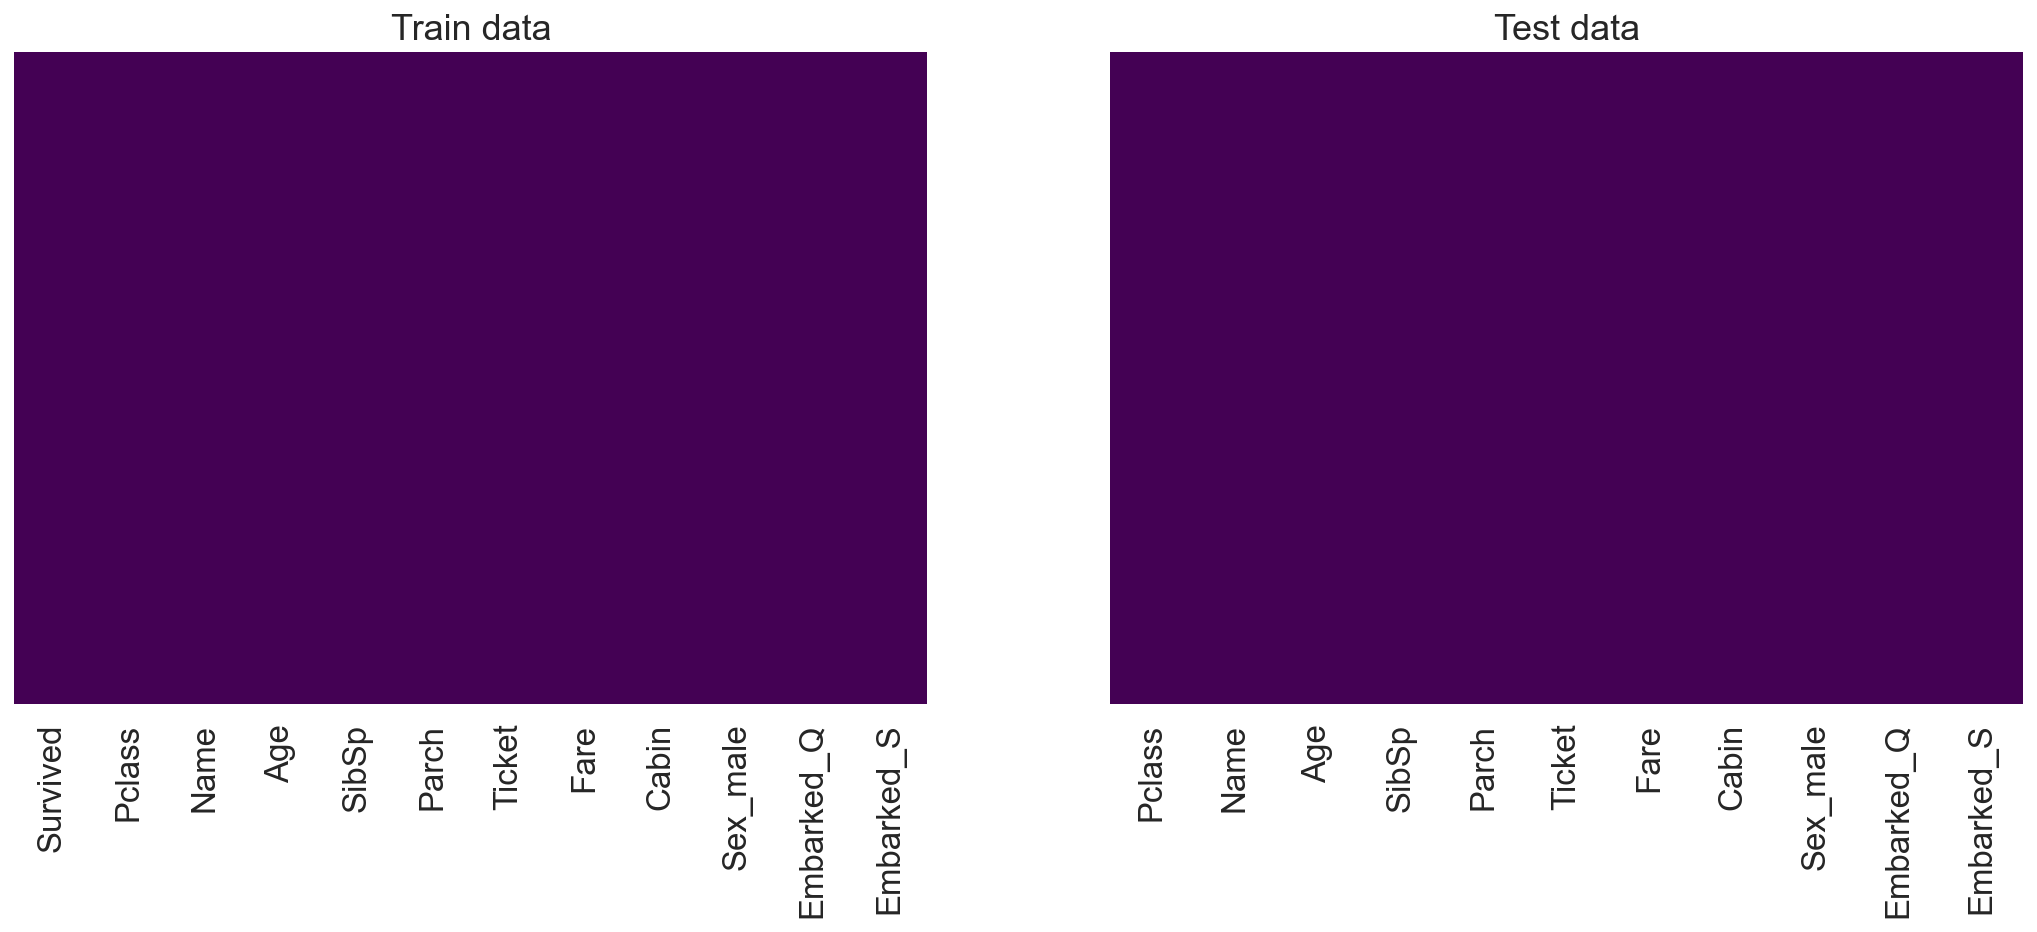

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

---

## Build the Model

#### Select Features

In [40]:
features_col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S']

#### Creating X and y

In [41]:
X_train = train[features_col]
y_train = train['Survived']
X_test = test[features_col]

## Scaling Features

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xs_train=scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

## Grid Search CV with knn

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbors= [6, 7,8, 9,10 ,11,12,14,16,18, 20, 22]
algorithm=['auto']
weights= ['uniform', 'distance']
leaf_size=list(range(1,50,5))
hyperparams= {
   'algorithm':algorithm,'leaf_size': leaf_size,
    'n_neighbors': n_neighbors,
   'weights': weights}
knn_1 = KNeighborsClassifier()
gs = GridSearchCV(estimator= knn_1, 
                  param_grid=hyperparams,verbose=True, 
                  cv=10,
                  scoring='roc_auc')
gs.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'],
                         'leaf_size': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'n_neighbors': [6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20,
                                         22],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=True)

**The score of model in Kaggle 0.37799**

## Using another k

In [44]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 20, 50, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
}
knn_1 = KNeighborsClassifier()
gs = GridSearchCV(knn_1, 
                  param_grid, 
                  cv=5,
                  scoring='roc_auc',
                  verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 9, 11, 20, 50, 100],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=1)

## Model Evaluation

In [45]:
gs.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')

In [46]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}

In [47]:
gs.score(X_train, y_train)

0.9994301174916648

In [48]:
gs.best_estimator_.fit(X_train,y_train)
y_pred_1=gs.best_estimator_.predict(X_test)
y_pred_1

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [50]:
temp=  pd.DataFrame(test_ID,columns=['PassengerId'])
temp['Survived'] = y_pred_1
temp.to_csv('../submission_Titanic_gridsearch.csv', index=False)

**The score of model in Kaggle 0.66267**

## Knn Model

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Model Evaluation

In [54]:
knn.score(X_train, y_train)

0.8035914702581369

In [55]:
# To see what accuracy we can expect from our KNN model
s = cross_val_score(knn, X_train, y_train, cv=5).mean()
print("{} {} Score:\t{:0.3}".format("Decision Tree", "Train", s.mean().round(3)))

Decision Tree Train Score:	0.684


In [56]:
# get best K on train data
scores_lst = []
for k_ in range(1,20):
    knn_test = KNeighborsClassifier(n_neighbors=k_)
    scores_lst.append((k_, np.mean(cross_val_score(knn_test, X_train, y_train, cv=5))))

In [57]:
scores_lst

[(1, 0.692524009792229),
 (2, 0.6745715899817964),
 (3, 0.7059820475801896),
 (4, 0.6947523695938735),
 (5, 0.6835352457472851),
 (6, 0.6813068859456406),
 (7, 0.6959136275186741),
 (8, 0.6858075450379761),
 (9, 0.6936601594375745),
 (10, 0.7004080095411462),
 (11, 0.7004017324712825),
 (12, 0.7004017324712823),
 (13, 0.7082731780804721),
 (14, 0.7094030506559538),
 (15, 0.7150147511141799),
 (16, 0.7116816270165087),
 (17, 0.7150398593936351),
 (18, 0.712792668382399),
 (19, 0.712792668382399)]

In [58]:
pred_knn = knn.predict(X_test)
pred_knn

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [59]:
knn.score( X_test , pred_knn)

1.0

In [61]:
sub_knn = pd.DataFrame(test_ID,columns=['PassengerId'])
sub_knn['Survived'] = pred_knn
sub_knn.to_csv('knn_submission.csv',index=False)

**The score of model in Kaggle 0.59569**

## Random Forest Model

In [62]:
rf = RandomForestClassifier()

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Model Evaluation

In [65]:
rf.score(X_train, y_train)

0.9854096520763187

In [66]:
# To see what accuracy we can expect from our KNN model
s = cross_val_score(rf, X_train, y_train, cv=5).mean()
print("{} {} Score:\t{:0.3}".format("Decision Tree", "Train", s.mean().round(3)))

Decision Tree Train Score:	0.809


In [67]:
pred_rf = rf.predict(X_test)
pred_rf

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
rf.score(X_test , pred_rf)

1.0

In [69]:
sub_rf = pd.DataFrame(test_ID,columns=['PassengerId'])
sub_rf['Survived'] =  pred_rf
sub_rf.to_csv('rf_submission.csv',index=False)

**The score of model in Kaggle is 0.74641**

## Decision Trees Model

In [70]:
dt = DecisionTreeClassifier()

In [71]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Model Evaluation

In [73]:
dt.score(X_train, y_train)

0.9854096520763187

In [74]:
# To see what accuracy we can expect from our KNN model
s = cross_val_score(dt, X_train, y_train, cv=5).mean()
print("{} {} Score:\t{:0.3}".format("Decision Tree", "Train", s.mean().round(3)))

Decision Tree Train Score:	0.788


In [75]:
pred_dt = dt.predict(X_test)
pred_dt

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
dt.score(X_test , pred_dt)

1.0

In [78]:
sub_dt = pd.DataFrame(test_ID,columns=['PassengerId'])
sub_dt['Survived'] = pred_dt
#temp.to_csv("../../_data/datasets/titanic/submission.csv", index = False)
sub_dt.to_csv('dt_submission.csv',index=False)

**The score of model in Kaggle 0.70813**

## Logistic Regression Model

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

In [80]:
logreg.score(X_train, y_train)

0.8080808080808081

In [81]:
y_pred = logreg.predict(X_test)

In [82]:
logreg.score(X_test, y_pred)

1.0

In [83]:
temp1 = pd.DataFrame(test_ID,columns=['PassengerId'])
temp1['Survived'] = y_pred
#temp.to_csv("../../_data/datasets/titanic/submission.csv", index = False)

In [84]:
temp1.to_csv("data\submission.csv", index = False)

**The score of model in Kaggle 0.76794**

## Grid Search with Logistic Regression 

In [85]:
C= np.logspace(1.0, 3.0,11)
penalty = ['l1','l2']
tol = np.logspace(2.0, 5.0,15)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 

hyperparams = {'C':C, 'penalty': penalty, 'tol': tol, 
               'solver': solver}

In [86]:
gs = GridSearchCV(logreg, 
                  hyperparams, 
                  cv=5,
                  scoring='roc_auc',
                  verbose=1)
gs.fit(Xs_train, y_train)

Fitting 5 folds for each of 1650 candidates, totalling 8250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([  10.        ,   15.84893192,   25.11886432,   39.81071706,
         63.09573445,  100.        ,  158.48931925,  251.18864315,
        398.10717055,  630.95734448, 1000.        ]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': array([   100.        ,    163.7893707 ,    268.26957953,    439.39705608,
          719.685673  ,   1178.76863479,   1930.69772888,   3162.27766017,
         5179.47467923,   8483.42898244,  13894.95494373,  22758.45926075,
        37275.93720315,  61054.02296585, 100000.        ])},
             scoring='roc_auc', verbose=1)

## Model Evaluation

In [ ]:
gs.best_estimator_

In [ ]:
log_gs=LogisticRegression(C=39.810717055349734, solver='saga', tol=37275.93720314938)
log_gs.fit(Xs_train, y_train)

In [ ]:
y_pred_gs = log_gs.predict(Xs_test)

In [ ]:
log_gs.score(Xs_test, y_pred_gs )

In [ ]:
temp2 = pd.DataFrame(test_ID,columns=['PassengerId'])
temp2['Survived'] = y_pred_gs 
#temp.to_csv("../../_data/datasets/titanic/submission.csv", index = False)

In [ ]:
temp2.head()

In [ ]:
temp2.to_csv("data\submission3.csv", index = False)

**The score of model in Kaggle 0.75837**

## The Final Result

After going through a bunch of processes, we have successfully built and evaluated different types of models in python also choosing the best model for our given dataset.The best score of model that we submitted in kaggle was Logistic Regression Model Which has the largest score and best submission is 0.76794.

**You can see our best submission in the kaggle:**


<img src="../images/Titanic_best_score.png" width="900">